## FFT Intro/Tutorial + PaHaW Analysis

This notebook is a very short introduction/tutorial for Fourier analysis. The last section of the notebook shows some applications to the PaHaW dataset.

(Irina Tolkova, 03/07/2021)

Just like a function can be decomposed into a sum of polynomials with a Taylor expansion, any periodic function can be approximated as a sum of sines/cosines with different frequencies. Since many types of data are physically waves -- electromagnetic, acoustic, seismic, etc -- the sum of sines/cosines can be the most informative way of looking at the data.

This is the foundational idea behind **Fourier analysis**. The Fourier transform converts a signal in the **time domain** to the underlying frequencies and phase shifts (in the **frequency domain**). The frequency content is often referred to as the **spectrum** of the data. An analogous **inverse Fourier transform** converts the frequency/phase information back to a time domain signal.

Note that mathematically, there are **continuous** and **discrete** formulations of the Fourier transform. The actual algorithm to calculate the discrete Fourier transform (DFT) for a signal, the **Fast Fourier Transform (FFT)**, was a breakthrough which reduced computational complexity from O(n^2) to O(n log(n)), and is considered one of the top 10 algorithms of the 20th century.

Below are some examples, starting with the transforms of single-frequency signals. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# define time axis
T = 1
N = 1000
t = np.linspace(0, T, N)
dt = T/N

# make several signals
x1 = np.sin(2 * np.pi * t)
x2 = np.sin(10 * np.pi * t)
x3 = np.sin(20 * np.pi * t)

Note that the frequencies of x1, x2, and x3 are 1 Hz, 5 Hz, and 10 Hz. Next, take the Fourier transform:


In [ ]:
# now take the Fourier transform, and look at their frequency content
f1 = np.abs(np.fft.fft(x1))
f2 = np.abs(np.fft.fft(x2))
f3 = np.abs(np.fft.fft(x3))

# which frequencies does the above output correspond to?
freqs = np.fft.fftfreq(N, 1/N)

Visualize the time domain and frequency domain signal:

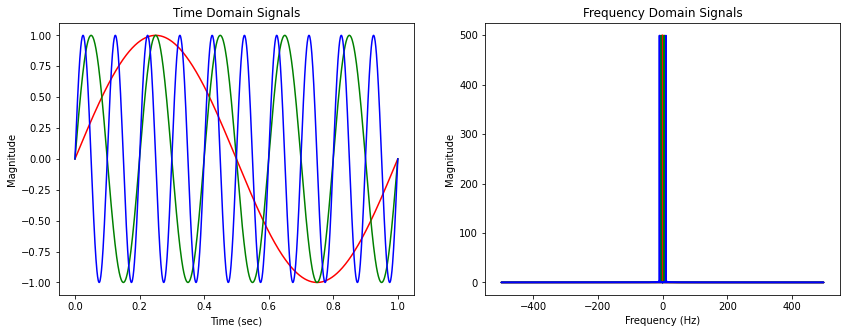

In [ ]:
# we can directly plot the frequencies and transformed values to visualize this
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x1, 'r', label='sin(2 * np.pi * t)')
plt.plot(t, x2, 'g', label='sin(10 * np.pi * t)')
plt.plot(t, x3, 'b', label='sin(20 * np.pi * t)')
plt.title('Time Domain Signals')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs, f1, 'r', label='FFT of sin(2 * np.pi * t)')
plt.plot(freqs, f2, 'g', label='FFT of sin(10 * np.pi * t)')
plt.plot(freqs, f3, 'b', label='FFT of sin(20 * np.pi * t)')
plt.title('Frequency Domain Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

...zoom in a bit to see the frequencies better...

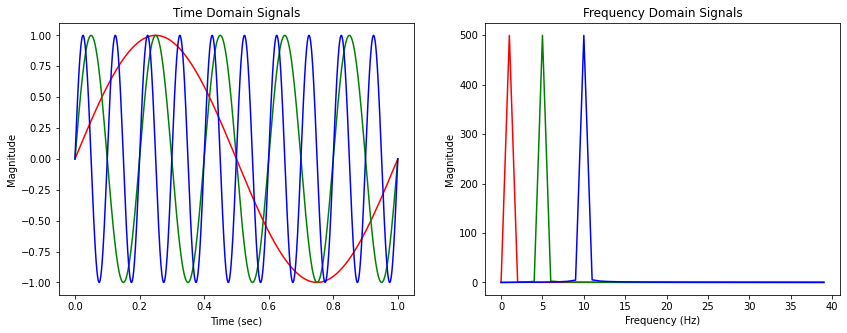

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x1, 'r', label='sin(2 * np.pi * t)')
plt.plot(t, x2, 'g', label='sin(10 * np.pi * t)')
plt.plot(t, x3, 'b', label='sin(20 * np.pi * t)')
plt.title('Time Domain Signals')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:40], f1[0:40], 'r', label='FFT of sin(2 * np.pi * t)')
plt.plot(freqs[0:40], f2[0:40], 'g', label='FFT of sin(10 * np.pi * t)')
plt.plot(freqs[0:40], f3[0:40], 'b', label='FFT of sin(20 * np.pi * t)')
plt.title('Frequency Domain Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

As predicted, the peaks are at 1 Hz, 5 Hz, and 10 Hz! Note that we were taking the absolute value of the FFT above. This is because the Fourier transform of a signal is complex: the complex magnitude represents the magnitude, and the complex exponent represents the phase. So, if the whole signal is shifted, the frequency content remains the same:

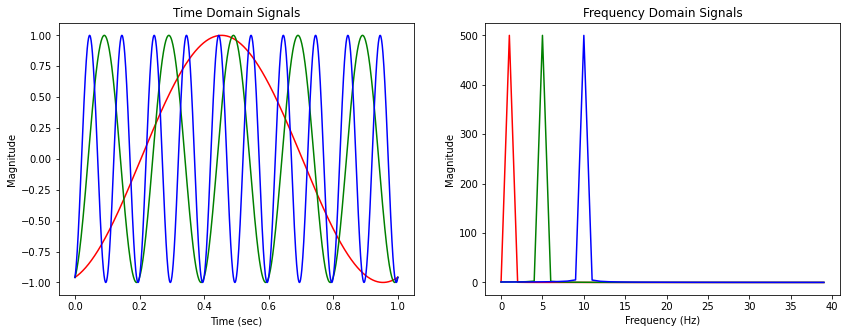

In [ ]:
# make several signals (note the phase shift!)
x1 = np.sin(2 * np.pi * t + 5)
x2 = np.sin(10 * np.pi * t + 5)
x3 = np.sin(20 * np.pi * t + 5)

# now take the Fourier transform
f1 = np.abs(np.fft.fft(x1))
f2 = np.abs(np.fft.fft(x2))
f3 = np.abs(np.fft.fft(x3))

# visualize
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x1, 'r', label='sin(2 * np.pi * t)')
plt.plot(t, x2, 'g', label='sin(10 * np.pi * t)')
plt.plot(t, x3, 'b', label='sin(20 * np.pi * t)')
plt.title('Time Domain Signals')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:40], f1[0:40], 'r', label='FFT of sin(2 * np.pi * t)')
plt.plot(freqs[0:40], f2[0:40], 'g', label='FFT of sin(10 * np.pi * t)')
plt.plot(freqs[0:40], f3[0:40], 'b', label='FFT of sin(20 * np.pi * t)')
plt.title('Frequency Domain Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

In reality, most measurements will not be a single frequency (**harmonic**). But when two waves of different frequencies are present, their signals add linearly. Fourier analysis can decompose the result into these components. For example, consider a signal which is a linear combination of three harmonic signals (at 2 Hz, 14.5 Hz, and 30 Hz).

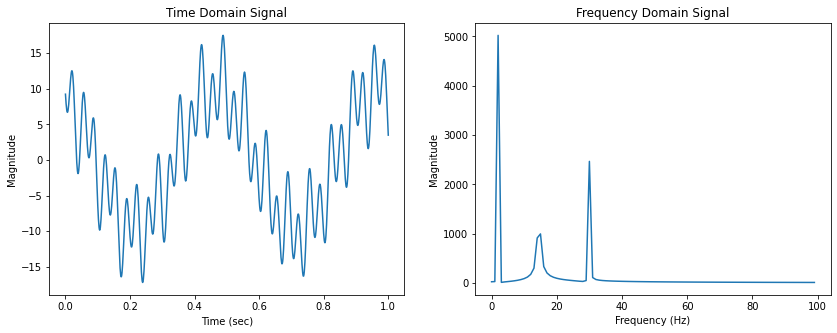

In [ ]:
x = 10 * np.sin(4 * np.pi * t + 2) + 3 * np.sin(29 * np.pi * t - 5) + 5 * np.sin(60 * np.pi * t + 10)
f = np.abs(np.fft.fft(x))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='sum of sinusoids')
plt.title('Time Domain Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:100], f[0:100])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

Note that a constant offset will correspod to a peak at 0. If the signal is not consistently centered around 0 (but increasing or decreasing overall), this can also make analysis difficult, as it is represented by a very low-frequency component.

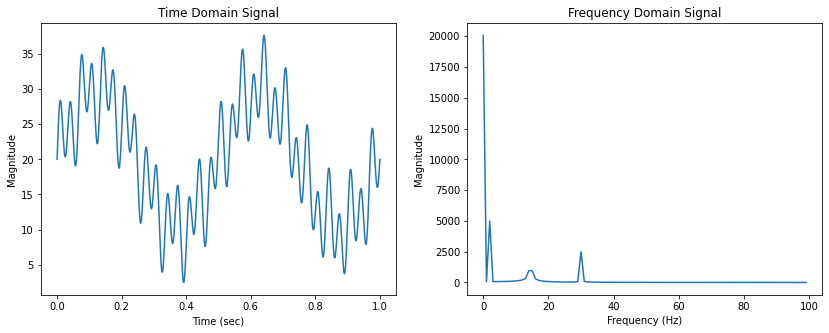

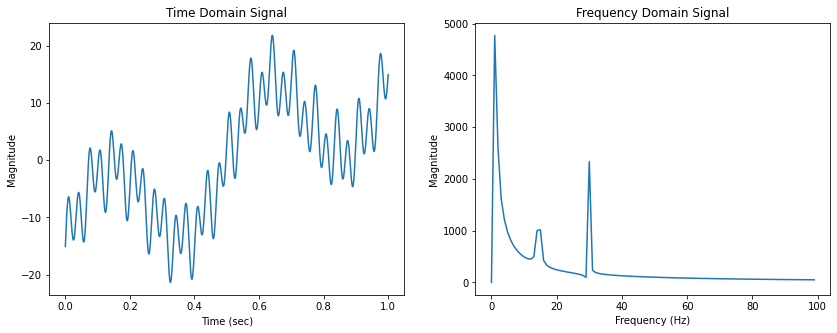

In [ ]:
# note the "+ 20"
x = 10 * np.sin(4 * np.pi * t) + 3 * np.sin(29 * np.pi * t) + 5 * np.sin(60 * np.pi * t) + 20
f = np.abs(np.fft.fft(x))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='sum of sinusoids')
plt.title('Time Domain Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:100], f[0:100])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

# note the "+ 30 * t"
x = 10 * np.sin(4 * np.pi * t) + 3 * np.sin(29 * np.pi * t) + 5 * np.sin(60 * np.pi * t) + 30 * t
f = np.abs(np.fft.fft(x - np.mean(x)))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x - np.mean(x), label='sum of sinusoids')
plt.title('Time Domain Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:100], f[0:100])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

Fourier analysis can directly be used for filtering. Specifically, we can modify the frequency content, then use an inverse transform to convert it back to a modified signal. **Lowpass filtering** refers to selecting only the low-frequency components (below a set threshold) of a signal, often used when the high-frequency components are assumed to be noise. Similarly, **highpass filtering** refers to selecting only high-frequency components abbove a set threshold, and **bandpass filtering** refers to selecting components within a set range.

In [ ]:
from scipy import signal as scipysig

def butter_lowpass_filter(data, cut, fs, order=5):
    b, a = scipysig.butter(order, cutoff, btype='low', analog=False)
    y = scipysig.filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cut, fs, order=5):
    b, a = scipysig.butter(order, cutoff, btype='high', analog=False)
    y = scipysig.filtfilt(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipysig.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = scipysig.lfilter(b, a, data)
    return y

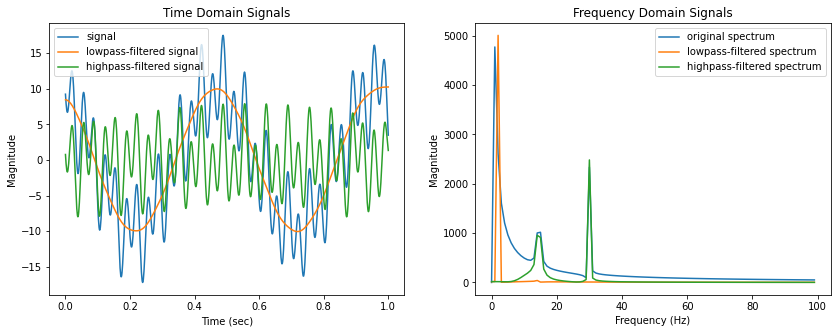

In [ ]:
# define signal
x = 10 * np.sin(4 * np.pi * t + 2) + 3 * np.sin(29 * np.pi * t - 5) + 5 * np.sin(60 * np.pi * t + 10)

# set normalized cutoff frequency
cutoff = 10/freqs[N//2-1]

# make filtered signals
x_lowpass = butter_lowpass_filter(x, cutoff, dt, order=5)
x_highpass = butter_highpass_filter(x, cutoff, dt, order=5)

# look at their spectra
f_lowpass = np.abs(np.fft.fft(x_lowpass))
f_highpass = np.abs(np.fft.fft(x_highpass))

# lowpass filter example
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='signal')
plt.plot(t, x_lowpass, label='lowpass-filtered signal')
plt.plot(t, x_highpass, label='highpass-filtered signal')

plt.legend()
plt.title('Time Domain Signals')
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:100], f[0:100], label='original spectrum')
plt.plot(freqs[0:100], f_lowpass[0:100], label='lowpass-filtered spectrum')
plt.plot(freqs[0:100], f_highpass[0:100], label='highpass-filtered spectrum')

plt.legend()
plt.title('Frequency Domain Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

## PaHaW Dataset Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy import interpolate
from scipy.signal import argrelextrema
import scipy
import statistics
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Unchanged code for getting patient/control filenames...

In [ ]:
excel = pd.read_excel('corpus_PaHaW.xlsx', engine = 'openpyxl')
# exclude patients 61, 80, 89
category = excel['Disease'].drop([46, 60, 66]).values

fileNames = []
controlFiles = []
patientFiles = []
directory = os.fsencode('/work/PaHaW_spirals')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    path = os.path.join('/work/PaHaW_spirals', filename)
    fileNames.append(path)

fileNames.sort()
print (fileNames)

for i in range(len(fileNames)):
    if category[i] == 'PD':
        patientFiles.append(fileNames[i])
    else:
        controlFiles.append(fileNames[i])

['/work/PaHaW_spirals/00001__1_1.csv', '/work/PaHaW_spirals/00002__1_1.csv', '/work/PaHaW_spirals/00003__1_1.csv', '/work/PaHaW_spirals/00004__1_1.csv', '/work/PaHaW_spirals/00005__1_1.csv', '/work/PaHaW_spirals/00006__1_1.csv', '/work/PaHaW_spirals/00007__1_1.csv', '/work/PaHaW_spirals/00008__1_1.csv', '/work/PaHaW_spirals/00009__1_1.csv', '/work/PaHaW_spirals/00010__1_1.csv', '/work/PaHaW_spirals/00013__1_1.csv', '/work/PaHaW_spirals/00014__1_1.csv', '/work/PaHaW_spirals/00015__1_1.csv', '/work/PaHaW_spirals/00016__1_1.csv', '/work/PaHaW_spirals/00017__1_1.csv', '/work/PaHaW_spirals/00018__1_1.csv', '/work/PaHaW_spirals/00019__1_1.csv', '/work/PaHaW_spirals/00020__1_1.csv', '/work/PaHaW_spirals/00022__1_1.csv', '/work/PaHaW_spirals/00023__1_1.csv', '/work/PaHaW_spirals/00024__1_1.csv', '/work/PaHaW_spirals/00025__1_1.csv', '/work/PaHaW_spirals/00026__1_1.csv', '/work/PaHaW_spirals/00027__1_1.csv', '/work/PaHaW_spirals/00028__1_1.csv', '/work/PaHaW_spirals/00029__1_1.csv', '/work/PaHa

In [ ]:
def azimuthPreventOverflow(csv_path):
    df = pd.read_csv(csv_path, header = None)
    azimuth_read = df[4]
    t = df[2]
    maximum = azimuth_read.max()
    azimuth = []
    # accounts for jumps
    threshold = 0.4
    if 0 in azimuth_read: 
        for i in azimuth_read: 
            if i/maximum < threshold: 
                i += maximum
            azimuth.append(i)
    else: 
        azimuth = azimuth_read
    return azimuth, t
    #return azimuth, azimuth_read 

Look at an example azimuth measurement:

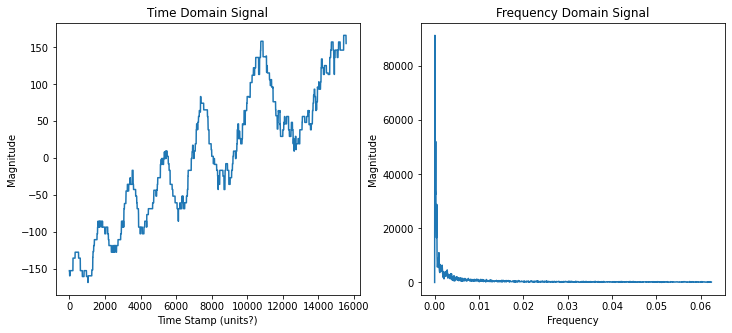

In [ ]:
# work with an example file
filename = patientFiles[2]
azimuth, t = azimuthPreventOverflow(filename)

# mean-center
azimuth = azimuth - np.mean(azimuth)

# time step
N = len(t)
dt = t[1] - t[0]

# fourier transform
f = np.abs(np.fft.fft(azimuth))

# which frequencies does the above output correspond to?
freqs = np.fft.fftfreq(N, dt)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, azimuth)
plt.title('Time Domain Signal')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:N//2], f[0:N//2])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

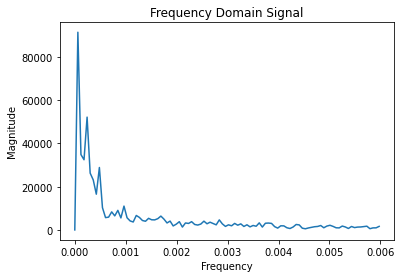

In [ ]:
# zoom in?
plt.plot(freqs[0:100], f[0:100])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

Try lowpass filtering the signal, then subtracting the filtered signal from the original to quantify high-frequency content?



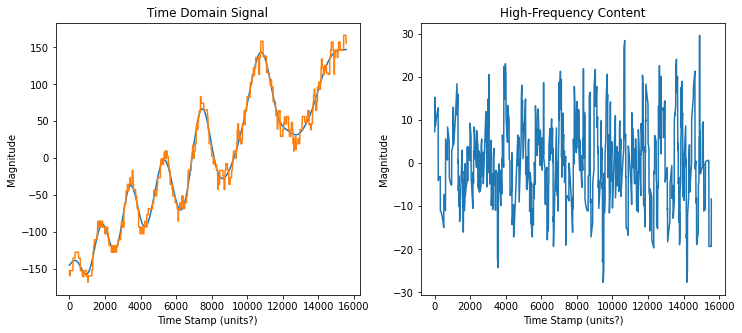

High-frequency content:  438.31


In [ ]:
# set frequency cutoff and apply lowpass filter
cutoff = 0.012
azimuth_filtered = butter_lowpass_filter(azimuth, cutoff, dt)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, azimuth_filtered, label='Lowpass Filter')
plt.plot(t, azimuth, label='Original Signal')
plt.title('Time Domain Signal')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(t, azimuth_filtered - azimuth, label='Difference')
#plt.ylim([0, 10000])
plt.title('High-Frequency Content')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.show()

# quantify amount of high-frequency content
print('High-frequency content: ', np.round(np.linalg.norm(azimuth_filtered - azimuth), 2))

Can this metric be used to differentiate patients vs control? (apparently not)

Text(0.5, 1.0, 'Relative amount of high-frequency content')

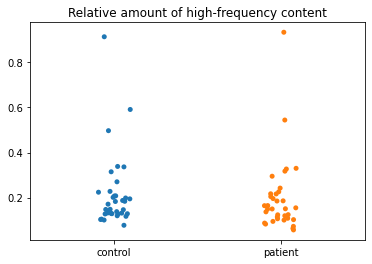

In [ ]:
cutoff = 0.001
high_frequency_metric = []

for filename in controlFiles + patientFiles: 
    # get azimuth
    azimuth, t = azimuthPreventOverflow(filename)
    azimuth = azimuth - np.mean(azimuth)

    # time step
    N = len(t)
    dt = t[1] - t[0]

    # apply lowpass filter
    azimuth_filtered = butter_lowpass_filter(azimuth, cutoff, dt)

    # calculate?
    high_frequency_metric.append(np.linalg.norm(azimuth_filtered - azimuth)/np.linalg.norm(azimuth))

labels = ['control'] * len(controlFiles) + ['patient'] * len(patientFiles)
sns.stripplot(x = labels, y = high_frequency_metric)
plt.title('Relative amount of high-frequency content')

Alternatively, try highpass-filtering the signal to look at characteristics oscillations?

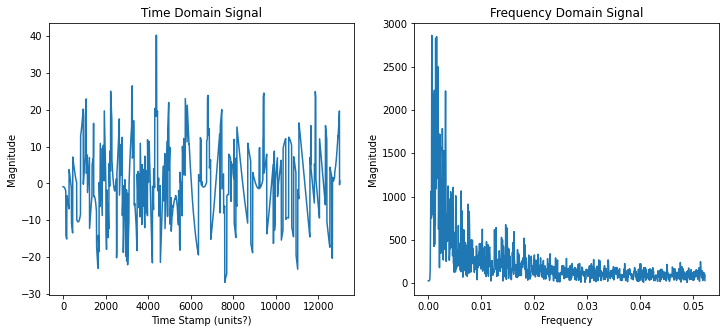

In [ ]:
# set frequency cutoff and also time step
cutoff = 0.012

# get highpass-filtered signal
azimuth_filtered_high = butter_highpass_filter(azimuth, cutoff, dt)

# look at FFT
f = np.abs(np.fft.fft(azimuth_filtered_high))

# look at the amount of high-frequency content by lowpass-filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, azimuth_filtered_high)
plt.title('Time Domain Signal')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:N//2], f[0:N//2])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

## Pressure Fourier Transform

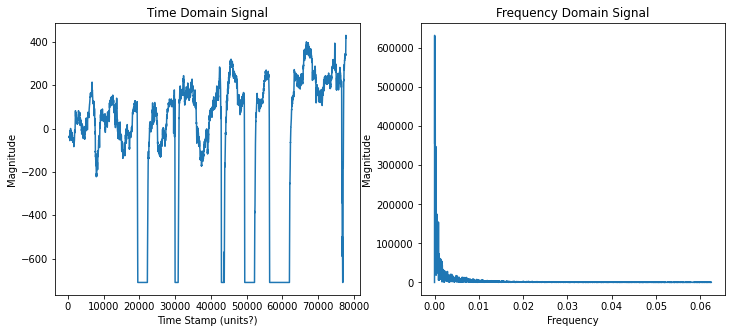

In [ ]:
# work with an example file
filename = patientFiles[6]

risingIndex, fallingIndex, df = mainSignalThreshold(filename)
t = df[2][risingIndex:fallingIndex]

pressure = df[6][risingIndex:fallingIndex]
pressure = pressure - np.mean(pressure)

# mean-center
pressure = pressure - np.mean(pressure)

# time step
N = len(t)
dt = t[risingIndex+1] - t[risingIndex]

# fourier transform
f = np.abs(np.fft.fft(pressure))

# which frequencies does the above output correspond to?
freqs = np.fft.fftfreq(N, dt)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, pressure)
plt.title('Time Domain Signal')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:N//2], f[0:N//2])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

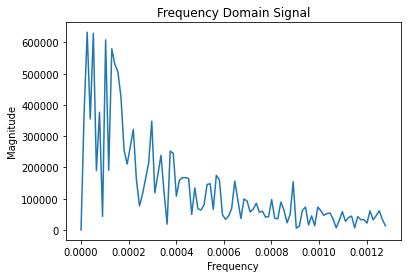

In [ ]:
# zoom in
plt.plot(freqs[0:100], f[0:100])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

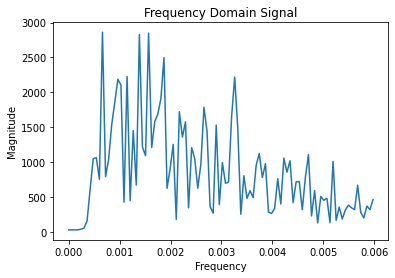

In [ ]:
def mainSignalThreshold(csv_path): 
    df = pd.read_csv(csv_path, header = None)
    pressure = df[6]
    risingIndex = 0
    fallingIndex = 0
    rising_threshold = 1
    falling_threshold = 0.7 # smaller threshold means steeper drop
    for i in range(1, (int)(len(pressure)/4)): 
        differential = pressure[i+15]/pressure[i]
        if differential <= rising_threshold and pressure[i+20]-pressure[0]>200: 
            risingIndex = i
            break
    for i in range(len(pressure) - 50, len(pressure)-5): #scan through last quarter
        differential = pressure[i+5]/pressure[i]
        if differential <= falling_threshold: 
            fallingIndex = i
            break
    if fallingIndex == 0:
        fallingIndex = len(pressure)-1

    return risingIndex, fallingIndex, df# zoom in?
plt.plot(freqs[0:100], f[0:100])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


Text(0.5, 1.0, 'Relative amount of low-frequency content')

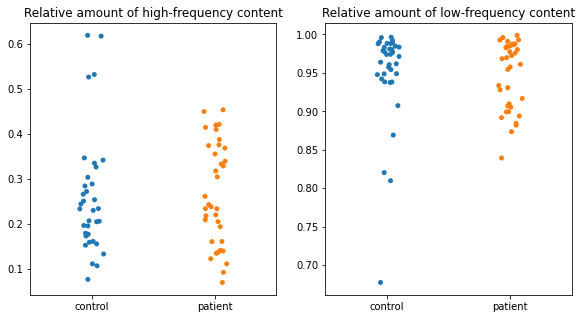

In [ ]:
cutoff = 0.012
lowcut = 
highcut = 
high_frequency_metric = []
low_frequency_metric = []
second_lowest_frequency_metric = [] # hopefully the sine/oscillating shape

for filename in controlFiles + patientFiles: 
    # get pressure
    risingIndex, fallingIndex, df = mainSignalThreshold(filename)
    t = df[2][risingIndex:fallingIndex]
    pressure = df[6][risingIndex:fallingIndex]
    pressure = pressure - np.mean(pressure)

    # time step
    N = len(t)
    dt = t[risingIndex+1] - t[risingIndex]

    # apply lowpass filter
    pressure_lowpass_filtered = butter_lowpass_filter(pressure, cutoff, dt)
    pressure_highpass_filtered = butter_highpass_filter(pressure, cutoff, dt)
    pressure_bandpass_filtered = butter_bandpass_filter(pressure, cutoff, dt)

    # calculate?
    high_frequency_metric.append(np.linalg.norm(pressure_lowpass_filtered - pressure)/np.linalg.norm(pressure))
    low_frequency_metric.append(np.linalg.norm(pressure_highpass_filtered - pressure)/np.linalg.norm(pressure))
    second_lowest_frequency_metric.append(n

labels = ['control'] * len(controlFiles) + ['patient'] * len(patientFiles)

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.stripplot(x = labels, y = high_frequency_metric)
plt.title('Relative amount of high-frequency content')
plt.subplot(1, 3, 2)
sns.stripplot(x = labels, y = low_frequency_metric)
plt.title('Relative amount of low-frequency content')

## Curvature Fourier Transform

In [ ]:
# return (velocity, acceleration, jerk, curvature)
def smoothCurveFeature(curve, n):
    smoothing_factor = len(curve[0,:]) * 100
    t = np.linspace(0, curve.shape[1], n)

    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[6])[0]), np.array(df[6]), k=1)
    
    sx.set_smoothing_factor(smoothing_factor)
    sy.set_smoothing_factor(smoothing_factor)
    pressure_f.set_smoothing_factor(smoothing_factor)
    
    # velocity based on the splined x and y coordinates
    sxdot = sx.derivative()
    sydot = sy.derivative()
    #xvelArr = sxdot(t)
    #yvelArr = sydot(t)
    
    # splined velocity functions (used to calculate acceleration)
    '''velx_spline = interpolate.UnivariateSpline(np.arange(len(xvelArr)), xvelArr, k=4)
    vely_spline = interpolate.UnivariateSpline(np.arange(len(yvelArr)), yvelArr, k=4)
    velx_spline.set_smoothing_factor(smoothing_factor)
    vely_spline.set_smoothing_factor(smoothing_factor)'''

    # acceleration functions based on the splined velocity x & y functions
    #sxdotdot = velx_spline.derivative()
    #sydotdot = vely_spline.derivative()
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()

    # splined acceleration functions 
    '''xaccArr = sxdotdot(t)
    yaccArr = sydotdot(t)
    accelx_spline = interpolate.UnivariateSpline(np.arange(len(xaccArr)), xaccArr, k=4)
    accely_spline = interpolate.UnivariateSpline(np.arange(len(yaccArr)), yaccArr, k=4)
    accelx_spline.set_smoothing_factor(smoothing_factor)
    accely_spline.set_smoothing_factor(smoothing_factor)'''

    # jerk based on splined accel x & y functions
    #sxdotdotdot = accelx_spline.derivative()
    #sydotdotdot = accely_spline.derivative()
    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()
    #xjerkArr = sxdotdotdot(t)
    #yjerkArr = sydotdotdot(t)

    #jerkx_spline = interpolate.UnivariateSpline(np.arange(len(xjerkArr)), xjerkArr, k=4)
    #jerky_spline = interpolate.UnivariateSpline(np.arange(len(yjerkArr)), yjerkArr, k=4)
    #jerkx_spline.set_smoothing_factor(smoothing_factor)
    #jerky_spline.set_smoothing_factor(smoothing_factor)
    
    '''new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)'''

    #calculate velocity
    velocity = np.sqrt((sydot(t))**2 + (sxdot(t))**2)
    #velocity_f = interpolate.UnivariateSpline(np.arange(len(velocity)), velocity)
    #velocity_f.set_smoothing_factor(smoothing_factor)

    #calculate acceleration
    acceleration = np.sqrt((sydotdot(t))**2 + (sxdotdot(t))**2)
    #accleration = np.sqrt((velx_spline(t))**2 + (vely_spline(t))**2)
    #acceleration = interpolate.UnivariateSpline(np.arange(len(accel)), accel)
    #acceleration.set_smoothing_factor(smoothing_factor)

    #calculate jerk
    #jerk = np.sqrt((accelx_spline(t))**2 + (accely_spline(t))**2)
    jerk = np.sqrt((sydotdotdot(t))**2 + (sxdotdotdot(t))**2)
    #jerk = interpolate.UnivariateSpline(np.arange(len(jk)), jk)
    #jerk.set_smoothing_factor(smoothing_factor)
    
    # calculate curvature
    curvature = (sxdot(t) * sydotdot(t) - sydot(t) * sxdotdot(t))/(sxdot(t)**2 + sydot(t)**2)**(3/2)

    pressure = pressure_f(t)

    '''# spline fit to curvature
    try: 
        curv_spline = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curvature)
    except: 
        print(len(np.arange(curve.shape[1])), len(curvature))
    curv_spline_eval = curv_spline(t)
    
    curv_dot_spline = curv_spline.derivative()
    curv_dot_eval = curv_dot_spline(t)'''
    
    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return sx(t), sy(t), velocity, acceleration, jerk, curvature, pressure


In [ ]:
filename = patientFiles[6]
df = pd.read_csv(filename, header = None)
x = df[0]
y = df[1]
#t = df[df[3]==1][2][:1480]
#n = 1480
curve = np.array([x, y])
print((smoothCurveFeature(curve, 5000)[5]))

[ 1.31965751e-01  1.57896579e-01  1.99709635e-01 ... -1.80382343e-04
 -1.14440586e-04 -6.86857632e-05]


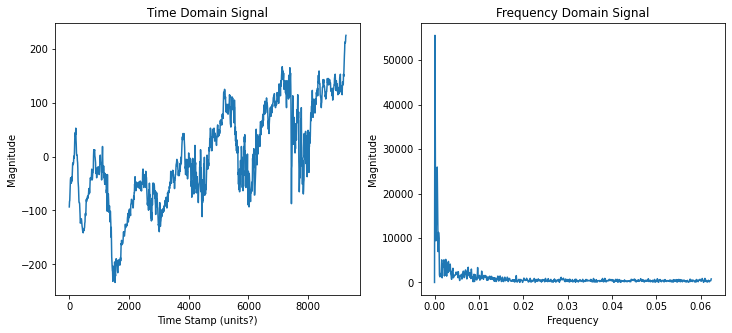

In [ ]:
# work with an example file
filename = patientFiles[7]
df = pd.read_csv(filename, header = None)
x = df[df[3]==1][0]
y = df[df[3]==1][1]
curve = np.array([x, y])
curvature = smoothCurveFeature(curve, 5000)[5]

risingIndex, fallingIndex, df = mainSignalThreshold(filename)
t = df[2][risingIndex:fallingIndex]

curvature = df[6][risingIndex:fallingIndex]
curvature = curvature - np.mean(curvature)

# mean-center
curvature = curvature - np.mean(curvature)

# time step
N = len(t)
dt = t[risingIndex+1] - t[risingIndex]

# fourier transform
f = np.abs(np.fft.fft(curvature))

# which frequencies does the above output correspond to?
freqs = np.fft.fftfreq(N, dt)

# plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, curvature)
plt.title('Time Domain Signal')
plt.xlabel('Time Stamp (units?)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(freqs[0:N//2], f[0:N//2])
#plt.ylim([0, 10000])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars

Text(0.5, 1.0, 'Relative amount of low-frequency content')

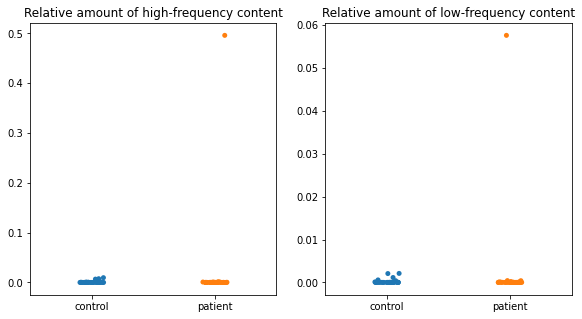

In [ ]:
cutoff = 0.012
#lowcut =
#highcut = 
high_frequency_metric = []
low_frequency_metric = []
second_lowest_frequency_metric = [] # hopefully the sine/oscillating shape

for filename in controlFiles + patientFiles: 
    # get curvature
    risingIndex, fallingIndex, df = mainSignalThreshold(filename)
    t = df[2][risingIndex:fallingIndex]

    x = df[df[3]==1][0]
    y = df[df[3]==1][1]
    curve = np.array([x, y])
    curvature = smoothCurveFeature(curve, 5000)[5]

    curvature = curvature[risingIndex:fallingIndex]
    curvature = curvature - np.mean(curvature)

    # time step
    N = len(t)
    dt = t[risingIndex+1] - t[risingIndex]

    # apply lowpass filter
    pressure_lowpass_filtered = butter_lowpass_filter(curvature, cutoff, dt)
    pressure_highpass_filtered = butter_highpass_filter(curvature, cutoff, dt)
    #pressure_bandpass_filtered = butter_bandpass_filter(curvature, cutoff, dt)

    # calculate?
    high_frequency_metric.append(np.linalg.norm(pressure_lowpass_filtered - curvature)/np.linalg.norm(pressure))
    low_frequency_metric.append(np.linalg.norm(pressure_highpass_filtered - curvature)/np.linalg.norm(pressure))

labels = ['control'] * len(controlFiles) + ['patient'] * len(patientFiles)

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.stripplot(x = labels, y = high_frequency_metric)
plt.title('Relative amount of high-frequency content')
plt.subplot(1, 3, 2)
sns.stripplot(x = labels, y = low_frequency_metric)
plt.title('Relative amount of low-frequency content')

In [ ]:
Q1 = np.quantile(curvature, 0.25)
Q3 = np.quantile(curvature, 0.75)
IQR = Q3 - Q1
outliers = (curvature < (Q1 - 1.5 * IQR)) |(curvature > (Q3 + 1.5 * IQR))
curvature = curvature[~outliers]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>